In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('../artifacts/raw/data.csv')

In [4]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [5]:
df.shape

(100000, 13)

In [6]:
df["Operation_Mode"].value_counts()

Operation_Mode
Active         70054
Idle           20057
Maintenance     9889
Name: count, dtype: int64

### DATA PROCESSING

In [7]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  object        
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [12]:
categorical_columns = ['Operation_Mode', 'Efficiency_Status']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

### Exploratory Data Analysis

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [16]:
len(numeric_cols)

10

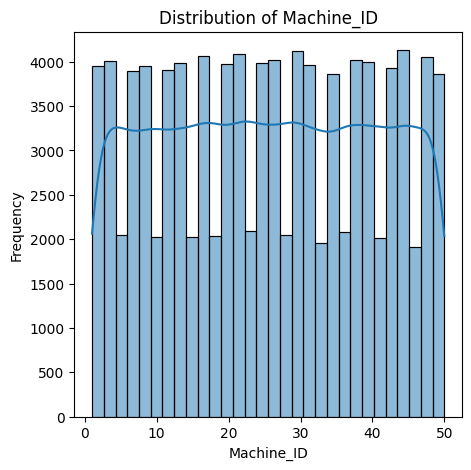

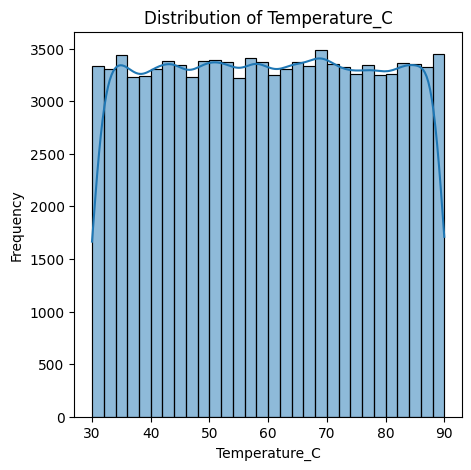

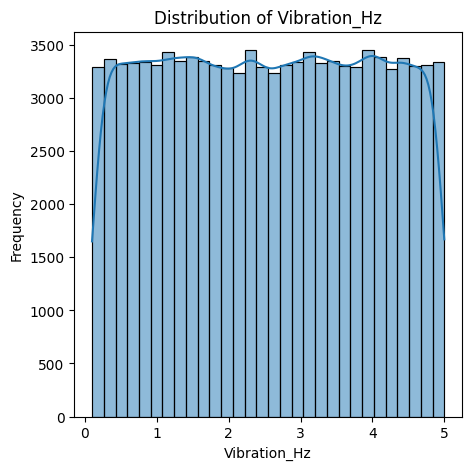

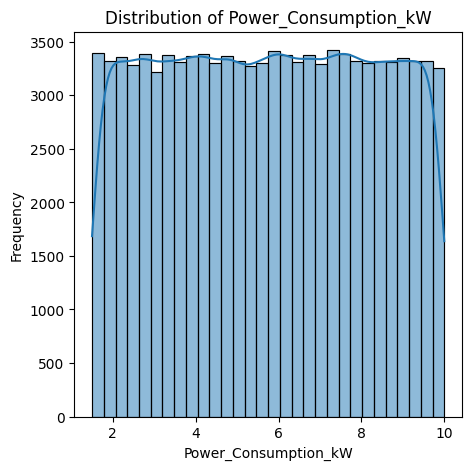

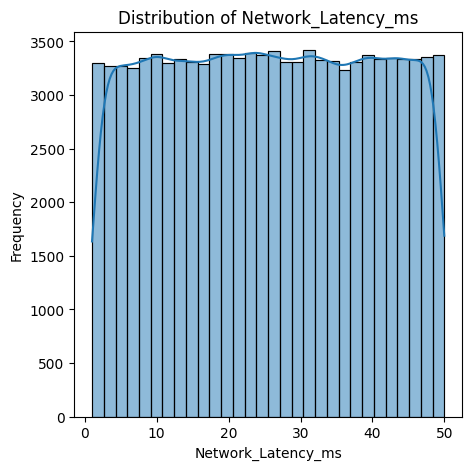

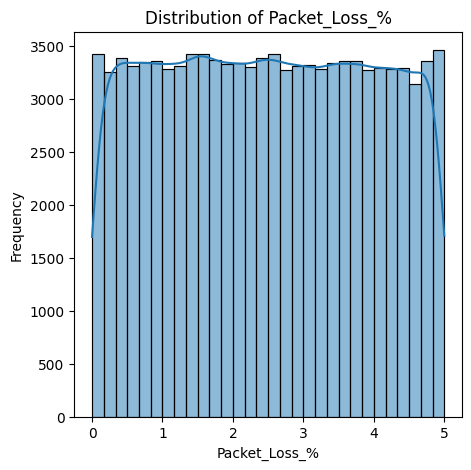

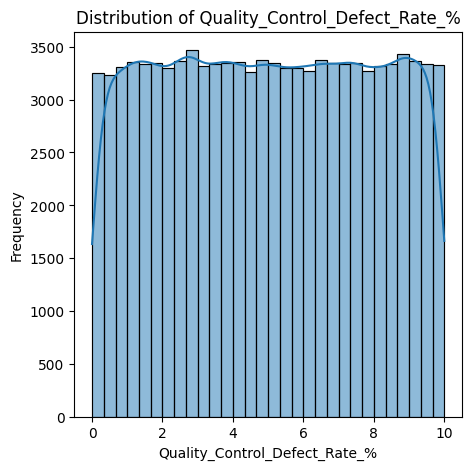

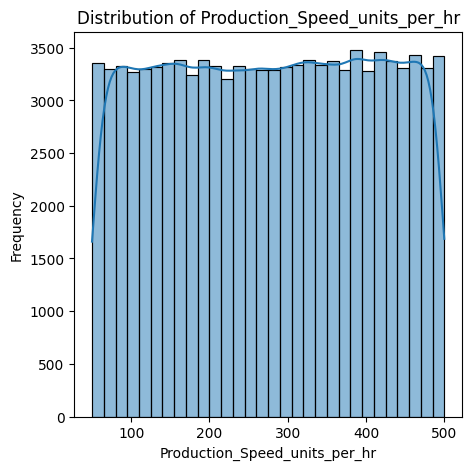

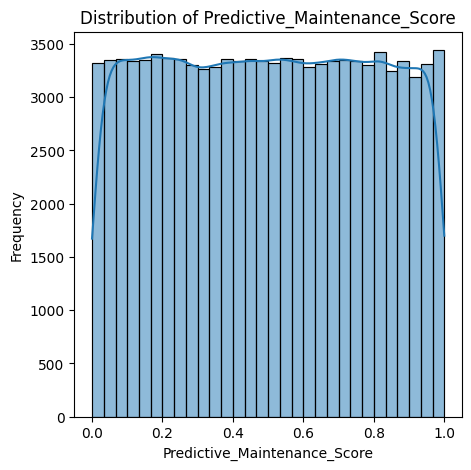

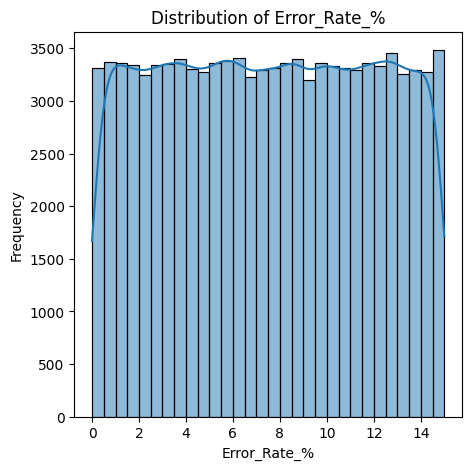

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

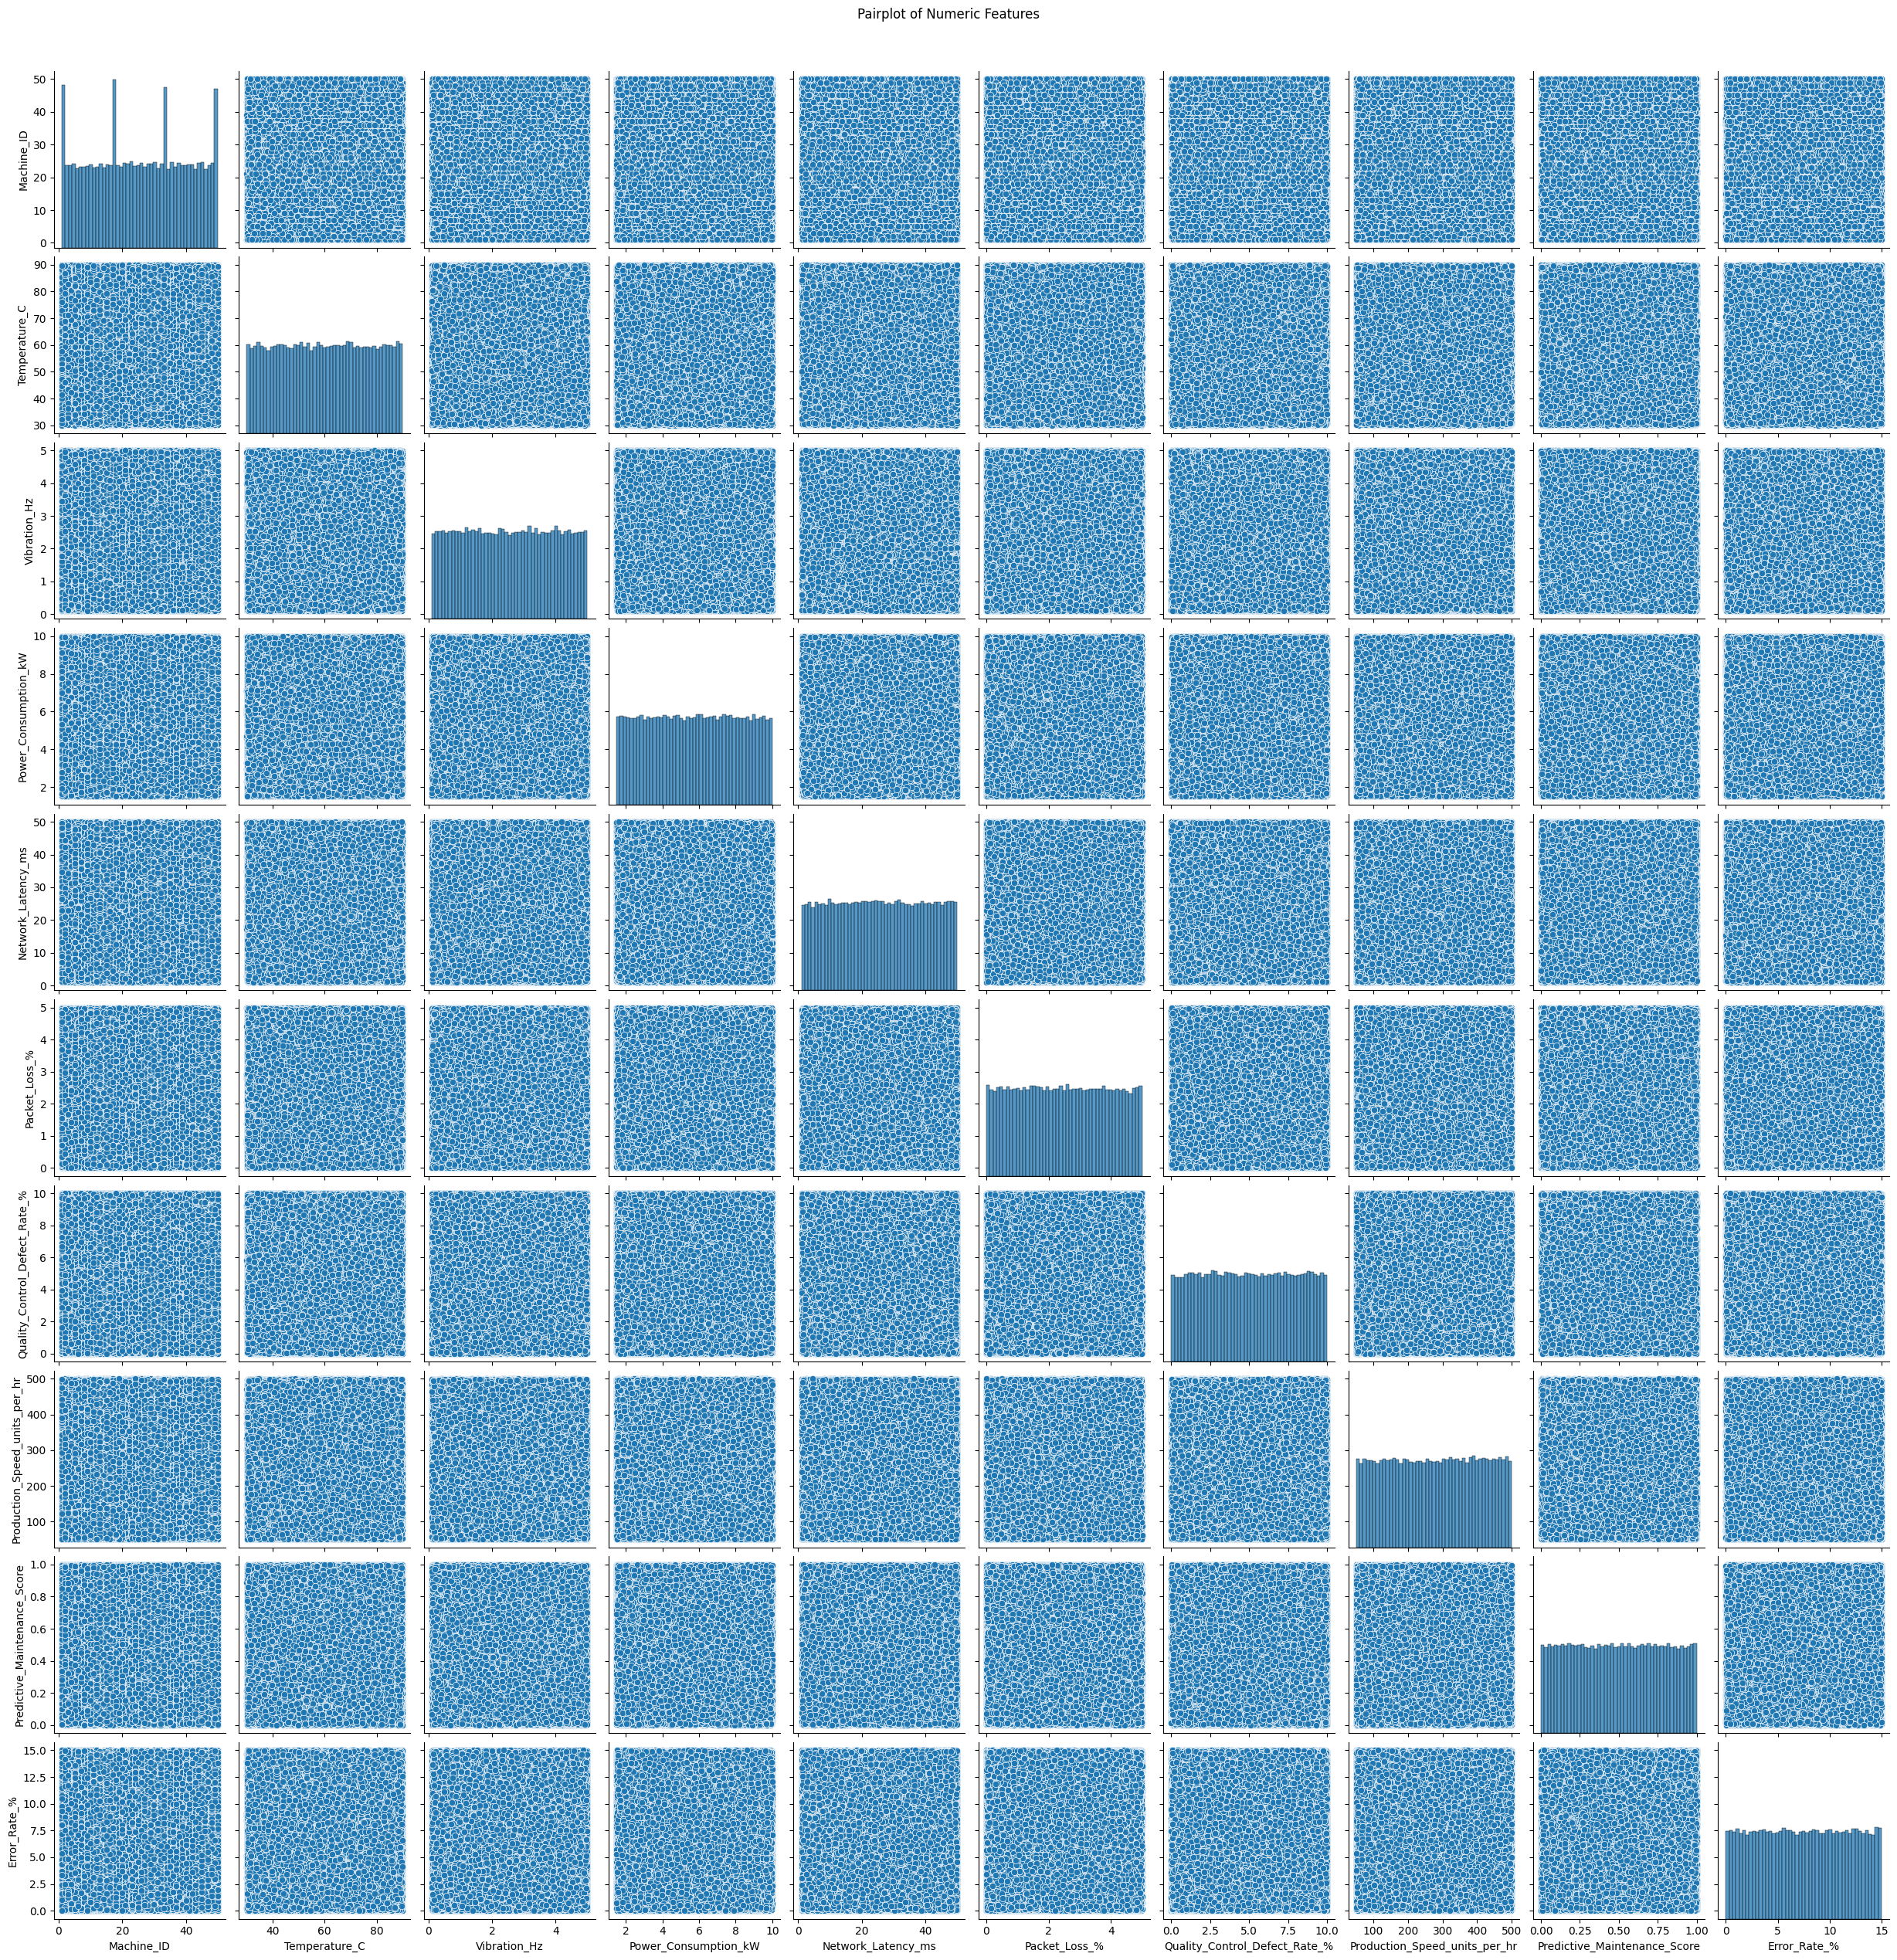

In [19]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

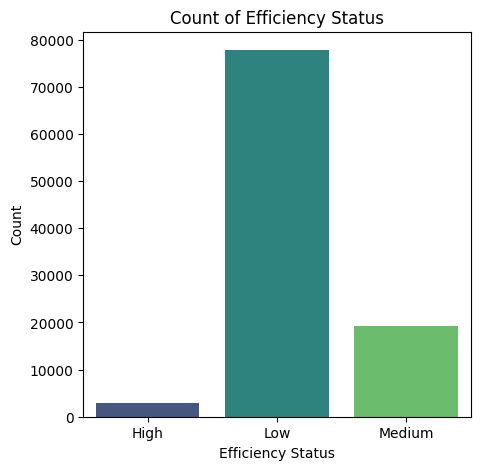

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Efficiency_Status', data=df, palette='viridis')
plt.title('Count of Efficiency Status')
plt.xlabel('Efficiency Status')
plt.ylabel('Count')
plt.show()

In [21]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [22]:
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day

df["Hour"] = df["Timestamp"].dt.hour

In [23]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [24]:
df.drop(columns=['Timestamp', 'Machine_ID', ], inplace=True)

In [44]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordered_categories = [["Low", "Medium", "High"]]
oe = OrdinalEncoder(categories=ordered_categories)
df["Efficiency_Target"] = oe.fit_transform(df[["Efficiency_Status"]])

In [45]:
df["Efficiency_Target"].value_counts()


Efficiency_Target
0.0    77825
1.0    19189
2.0     2986
Name: count, dtype: int64

In [46]:
le = LabelEncoder()
df["Operation_Mode"] = le.fit_transform(df["Operation_Mode"])

In [47]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_Target'],
      dtype='object')

In [48]:
features = [
    'Operation_Mode', 'Temperature_C', 'Vibration_Hz',
    'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score', 'Error_Rate_%', 
    'Year', 'Month', 'Day', 'Hour'
]

In [49]:
X = df[features]

In [50]:
y = df["Efficiency_Target"]

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
y_pred = clf.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
accuracy_score(y_test, y_pred)

0.9152

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     15565
         1.0       0.79      0.76      0.78      3838
         2.0       0.85      0.83      0.84       597

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.91     20000



### Permutation Importance

In [62]:
from sklearn.inspection import permutation_importance

In [64]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

In [67]:
importance_df = pd.DataFrame({
    'Feature' : features,
    'Importance' : result.importances_mean,
    
})

In [69]:
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [70]:
importance_df

Feature  Importance
9                    Error_Rate_%    0.236310
7   Production_Speed_units_per_hr    0.116350
3            Power_Consumption_kW    0.000155
4              Network_Latency_ms    0.000145
2                    Vibration_Hz    0.000085
1                   Temperature_C    0.000065
13                           Hour    0.000045
10                           Year    0.000000
12                            Day   -0.000015
5                   Packet_Loss_%   -0.000020
0                  Operation_Mode   -0.000025
8    Predictive_Maintenance_Score   -0.000110
6   Quality_Control_Defect_Rate_%   -0.000140
11                          Month   -0.000395